<a href="https://colab.research.google.com/github/pol3rd/my_first_ML_model/blob/main/ML3_TITANIC__Kaggle_competition_(TO_DO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TITANIC: Kaggle competition

**TAREA: CLASIFICACIÓN**<br>
**NIVEL: INTERMEDIATE**

Vamos a participar en la competicion de **Kaggle del Titanic**: https://www.kaggle.com/competitions/titanic <br> Para ello atacaremos 3 puntos clave para obtener el mejor modelo posible:
* ML Preprocessing
* Competicion de modelos
* Hiperparametros
<br><br>
A diferencia de en el flujo ML convencional, en las competiciones de Kaggle no haremos la evaluación del TEST en el notebook, sino que tendremos que subir un predict del test a la plataforma de submissions y la plataforma lo evaluará.
<br><br>
...A POR ELLO!

# Librerias

Importar llibrerias

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, MinMaxScaler, OrdinalEncoder

import folium
import plotly.express as px

# Load dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Importar el dataset

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Titanic - Machine Learning from Disaster/train.csv')

# ML Preprocessing

## EDA

Análisis exploratorio de los datos

#### **Valores Faltantes**

In [ ]:
for column_name in df:
  if df[column_name].isnull().sum()>=1:
    print("Faltan:", df[column_name].isnull().sum(), f"valores para {column_name}")

Faltan: 177 valores para Age
Faltan: 687 valores para Cabin
Faltan: 2 valores para Embarked


- **Edad**: Faltan 177 valores. Esto es crucial, ya que la edad podría ser un factor significativo en la supervivencia.
- **Cabina**: Faltan 687 valores. La gran cantidad de datos faltantes hace que esta variable sea menos confiable para el modelado.
- **Embarcado**: Solo faltan 2 valores, lo que es relativamente menor y puede ser manejable.

#### **Estadísticas Resumidas**:

In [ ]:
edad_minima = df['Age'].min()
edad_maxima = df['Age'].max()

edad_media = np.mean(df['Age'])

print(f"La edad varía de {edad_minima} años a {edad_maxima} años, con una edad media de aproximadamente {edad_media.round()} años.")

La edad varía de 0.42 años a 80.0 años, con una edad media de aproximadamente 30.0 años.


In [ ]:
registros = df['Pclass'].unique().tolist()

registro_con_mas_ocurrencias = max(registros, key = registros.count)

print(f"La mayoría de los pasajeros están en la tercera clase (Pclass={registro_con_mas_ocurrencias}).")

La mayoría de los pasajeros están en la tercera clase (Pclass=3).


#### **Distribución de Características Categóricas**:

In [ ]:
men_on_board = (df['Sex']=='male').sum()
women_on_board = (df['Sex']=='female').sum()

print(f"Hay más hombres ({men_on_board}) que mujeres ({women_on_board}) a bordo.")

Hay más hombres (577) que mujeres (314) a bordo.


In [ ]:
registros = df['Embarked'].unique().tolist()

registro_con_mas_ocurrencias = max(registros, key = registros.count)

print(f"La mayoría de los pasajeros embarcaron en '{registro_con_mas_ocurrencias}' (Southampton)")

La mayoría de los pasajeros embarcaron en 'S' (Southampton)


## Data cleaning

# **df['Name'] Tratamiento de la variable.**

In [ ]:
df['Name'].head(2)

0                              Braund, Mr. Owen Harris
1    Cumings, Mrs. John Bradley (Florence Briggs Th...
Name: Name, dtype: object

**Paso 1: Extracción de Títulos**

In [ ]:
def extract_title(name):

  title = name.split(",")[1].split(".")[0].strip()

  return title

**Paso 2: Aplicación de la Función de Extracción**

In [ ]:
df['Title'] = df['Name'].apply(extract_title)

**Paso 3: Mapeo y Normalización de Títulos**

In [ ]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [ ]:
title_mapping = {
    "Mr": "Mr",
    "Miss" : "Miss",
    "Mrs" : "Mrs",
    "Master" : "Master",
    "Dr" : "Professional",
    "Rev" : "Professional",
    "Major" : "Military",
    "Col" : "Military",
    "Capt" : "Military",
    "Jonkheer" : "Nobility",
    "Sir" : "Nobility",
    "Lady" : "Nobility",
    "the Countess" : "Nobility",
    "Don" : "Nobility",
    "Dona" : "Nobility",
    "Mme" : "Mrs",
    "Mlle" : "Miss",
    "Ms" : "Miss"

}

**Paso 4: Aplicación del Mapeo a los Títulos**

In [ ]:
df['Title_Category'] = df['Title'].map(title_mapping)

**Paso 5: Eliminación de ['Name','Title']**

In [ ]:
df.drop(['Name','Title'], axis = 1, inplace = True)

In [ ]:
num_records_by_title = df['Title_Category'].value_counts()

num_records_by_title

Mr              517
Miss            185
Mrs             126
Master           40
Professional     13
Nobility          5
Military          5
Name: Title_Category, dtype: int64

El step del data cleaning es el cajón de sastre donde corregiremos las particularidades del dataset más allá del ML preprocessing estandar. Por ejemplo:
* Eliminar registros duplicados


In [ ]:
df.duplicated().any() # No hay registros duplicados

False

* Eliminar filas sin target informado


In [ ]:
df['Survived'].isnull().any() # No hay

False

* Eliminar columnas irrelevantes


In [ ]:
del(df['PassengerId'])

* Corregir erratas en literales


# **df['Ticket'] Tratamiento de la variable.**

In [ ]:
df['Ticket'].unique()

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

Tras analizar los prefijos de los tickets, hemos encontrado lo siguiente:

- La mayoría de los tickets son puramente numéricos
- Hay varios prefijos recurrentes como PC, CA, A5, entre otros
- Algunos prefijos aparecen en formatos ligeramente variados pero posiblemente refiriéndose a la misma categoría (por ejemplo, SC/PARIS vs. SC/Paris).



In [ ]:
def extract_ticket_prefix(ticket):

  if ticket.isdigit():
    return 'NUMERIC'
  else:
    return ticket.replace('.','').replace('/','').split()[0].upper()

In [ ]:
df['Ticket_Prefix'] = df['Ticket'].apply(extract_ticket_prefix)

In [ ]:
def normalize_and_group_prefix(prefix):
  if 'STONO' in prefix:
    return 'STONO'
  elif 'SC' in prefix:
    return 'SC'
  elif 'C' in prefix and len(prefix) < 3:
    return 'C'
  common_prefixes = ['NUMERIC', 'PC', 'CA', 'A5', 'SQTONOQ', 'STONO', 'WC', 'SC', 'C']
  if prefix in common_prefixes:
    return prefix
  else:
    return 'OTHER'

In [ ]:
df['Ticket_Prefix_Grouped'] = df['Ticket_Prefix'].apply(normalize_and_group_prefix)

In [ ]:
df['Ticket_Prefix_Grouped'].value_counts()

NUMERIC    661
C          117
OTHER       57
A5          21
STONO       18
SC          17
Name: Ticket_Prefix_Grouped, dtype: int64

In [ ]:
df.drop(['Ticket_Prefix', 'Ticket'], axis = 1, inplace = True)

# **df['Cabin'] Tratamiento de la variable.**

In [ ]:
for column_name in df:
  if df[column_name].isnull().sum()>=1:
    print("Faltan:", df[column_name].isnull().sum(), f"valores para {column_name}")

Faltan: 177 valores para Age
Faltan: 687 valores para Cabin
Faltan: 2 valores para Embarked


In [ ]:
df['Cabin'].fillna('Unknown', inplace = True)

In [ ]:
def process_cabin(cabin_value):
  if cabin_value == 'Unknown' or cabin_value[0] == 'T':
    return 'Unknown'
  else:
    return cabin_value.split()[0][0]

In [ ]:
df['Cabin_Reduced'] = df['Cabin'].apply(process_cabin)

In [ ]:
df['Cabin_Reduced'].value_counts()

Unknown    688
C           59
B           47
D           33
E           32
A           15
F           13
G            4
Name: Cabin_Reduced, dtype: int64

* Corregir data types

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Survived               891 non-null    int64  
 1   Pclass                 891 non-null    int64  
 2   Sex                    891 non-null    object 
 3   Age                    714 non-null    float64
 4   SibSp                  891 non-null    int64  
 5   Parch                  891 non-null    int64  
 6   Fare                   891 non-null    float64
 7   Cabin                  891 non-null    object 
 8   Embarked               889 non-null    object 
 9   Title_Category         891 non-null    object 
 10  Ticket_Prefix_Grouped  891 non-null    object 
 11  Cabin_Reduced          891 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


In [ ]:
df['Pclass'] = df['Pclass'].astype('category')
df['Pclass'] = df['Pclass'].replace({1: "1ª clase", 2: "2ª clase", 3: "3ª clase"})

In [ ]:
df['Sex'] = df['Sex'].astype('category')

In [ ]:
df['SibSp'] = df['SibSp'].astype('int8')

In [ ]:
df['Parch'] = df['Parch'].astype('int8')

In [ ]:
df['Fare'] = df['Fare'].astype('float32')

In [ ]:
del(df['Cabin'])

In [ ]:
df['Title_Category'] = df['Title_Category'].astype('category')

In [ ]:
df['Ticket_Prefix_Grouped'] = df['Ticket_Prefix_Grouped'].astype('category')

In [ ]:
df['Cabin_Reduced'] = df['Cabin_Reduced'].astype('category')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   Survived               891 non-null    int64   
 1   Pclass                 891 non-null    category
 2   Sex                    891 non-null    category
 3   Age                    714 non-null    float64 
 4   SibSp                  891 non-null    int8    
 5   Parch                  891 non-null    int8    
 6   Fare                   891 non-null    float32 
 7   Embarked               889 non-null    object  
 8   Title_Category         891 non-null    category
 9   Ticket_Prefix_Grouped  891 non-null    category
 10  Cabin_Reduced          891 non-null    category
dtypes: category(5), float32(1), float64(1), int64(1), int8(2), object(1)
memory usage: 31.7+ KB


In [ ]:
...

Ellipsis

## Imputar valores en nulos

Algunas de las estrategias mas comunes:
* Imputar valor outlier (-999, 'Unknown')
* Imputar media en numericos
* Imputar moda en categoricos
* Imputar 0

In [ ]:
df['Age'].fillna(-999,inplace=True)

In [ ]:
df['Age'] = df['Age'].astype('float32')

In [ ]:
df['Embarked'] = df['Embarked'].replace({'C' : 'Cherbourg', 'Q': 'Queenstown', 'S' : 'Southampton'})

In [ ]:
df['Embarked'].fillna('Unknown', inplace = True)

In [ ]:
df['Embarked'].value_counts()

Southampton    644
Cherbourg      168
Queenstown      77
Unknown          2
Name: Embarked, dtype: int64

In [ ]:
df['Embarked'] = df['Embarked'].astype('category')

In [ ]:
df.isnull().any()

Survived                 False
Pclass                   False
Sex                      False
Age                      False
SibSp                    False
Parch                    False
Fare                     False
Embarked                 False
Title_Category           False
Ticket_Prefix_Grouped    False
Cabin_Reduced            False
dtype: bool

In [ ]:
...

Ellipsis

## Encoding categoricos

3 opciones:
* Si tienen un sentido ordinal -> convertir a numerico.
* Si tienen un sentido cardinal:
  * 2 posibles categorias -> indicador booleano
  * más de 2 categorias -> One-Hot-Encoding

In [ ]:
encoder = OrdinalEncoder(categories=[['1ª clase', '2ª clase', '3ª clase']])
df['Pclass'] = encoder.fit_transform(df[['Pclass']])
# '3ª clase' == 2.0, '2ª clase' == 1.0, '1ª clase' == 0.0

In [ ]:
df = pd.get_dummies(df, columns=['Sex', 'Title_Category', 'Cabin_Reduced', 'Ticket_Prefix_Grouped', 'Embarked'])


In [ ]:
df.head(10)

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Category_Master,Title_Category_Military,...,Ticket_Prefix_Grouped_A5,Ticket_Prefix_Grouped_C,Ticket_Prefix_Grouped_NUMERIC,Ticket_Prefix_Grouped_OTHER,Ticket_Prefix_Grouped_SC,Ticket_Prefix_Grouped_STONO,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Embarked_Unknown
0,0,2.0,22.0,1,0,7.250000,0,1,0,0,...,1,0,0,0,0,0,0,0,1,0
1,1,0.0,38.0,1,0,71.283302,1,0,0,0,...,0,1,0,0,0,0,1,0,0,0
2,1,2.0,26.0,0,0,7.925000,1,0,0,0,...,0,0,0,0,0,1,0,0,1,0
3,1,0.0,35.0,1,0,53.099998,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4,0,2.0,35.0,0,0,8.050000,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
5,0,2.0,-999.0,0,0,8.458300,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
6,0,0.0,54.0,0,0,51.862499,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
7,0,2.0,2.0,3,1,21.075001,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
8,1,2.0,27.0,0,2,11.133300,1,0,0,0,...,0,0,1,0,0,0,0,0,1,0
9,1,1.0,14.0,1,0,30.070801,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [ ]:
df.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female',
       'Sex_male', 'Title_Category_Master', 'Title_Category_Military',
       'Title_Category_Miss', 'Title_Category_Mr', 'Title_Category_Mrs',
       'Title_Category_Nobility', 'Title_Category_Professional',
       'Cabin_Reduced_A', 'Cabin_Reduced_B', 'Cabin_Reduced_C',
       'Cabin_Reduced_D', 'Cabin_Reduced_E', 'Cabin_Reduced_F',
       'Cabin_Reduced_G', 'Cabin_Reduced_Unknown', 'Ticket_Prefix_Grouped_A5',
       'Ticket_Prefix_Grouped_C', 'Ticket_Prefix_Grouped_NUMERIC',
       'Ticket_Prefix_Grouped_OTHER', 'Ticket_Prefix_Grouped_SC',
       'Ticket_Prefix_Grouped_STONO', 'Embarked_Cherbourg',
       'Embarked_Queenstown', 'Embarked_Southampton', 'Embarked_Unknown'],
      dtype='object')

In [ ]:
df.shape

(891, 33)

In [ ]:
...

Ellipsis

## Eliminar alta correlación

In [ ]:
corr = df.corr()

In [ ]:
corr.style.background_gradient()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Title_Category_Master,Title_Category_Military,Title_Category_Miss,Title_Category_Mr,Title_Category_Mrs,Title_Category_Nobility,Title_Category_Professional,Cabin_Reduced_A,Cabin_Reduced_B,Cabin_Reduced_C,Cabin_Reduced_D,Cabin_Reduced_E,Cabin_Reduced_F,Cabin_Reduced_G,Cabin_Reduced_Unknown,Ticket_Prefix_Grouped_A5,Ticket_Prefix_Grouped_C,Ticket_Prefix_Grouped_NUMERIC,Ticket_Prefix_Grouped_OTHER,Ticket_Prefix_Grouped_SC,Ticket_Prefix_Grouped_STONO,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton,Embarked_Unknown
Survived,1.000000,-0.338481,0.089941,-0.035322,0.081629,0.257307,0.543351,-0.543351,0.085221,0.002496,0.335636,-0.549199,0.341994,0.033391,-0.038299,0.022287,0.175095,0.114652,0.150716,0.145321,0.057935,0.016040,-0.319572,-0.092199,0.075785,0.001492,-0.074305,0.024878,0.017895,0.168240,0.003650,-0.155660,0.060095
Pclass,-0.338481,1.000000,-0.183331,0.083081,0.018443,-0.549500,-0.131900,0.131900,0.082081,-0.117649,-0.010261,0.142698,-0.153758,-0.117649,-0.100953,-0.204934,-0.369572,-0.417048,-0.278690,-0.230091,0.011063,0.055561,0.722607,0.128545,-0.250982,0.079763,0.079080,-0.041696,0.118804,-0.243292,0.221009,0.081720,-0.074282
Age,0.089941,-0.183331,1.000000,-0.026309,0.118371,0.103554,0.052524,-0.052524,0.041641,0.042305,-0.002680,-0.086957,0.070001,0.039561,0.040630,0.003417,0.095172,0.045648,0.072008,0.069540,0.011215,0.030974,-0.150247,0.022075,0.020398,-0.056692,0.015272,0.006416,0.070766,-0.032240,-0.337683,0.237399,0.025949
SibSp,-0.035322,0.083081,-0.026309,1.000000,0.414838,0.159651,0.114631,-0.114631,0.349559,-0.022017,0.083462,-0.250489,0.061668,-0.008384,-0.015279,-0.046266,-0.034538,0.029251,-0.017575,-0.036865,0.001706,-0.001402,0.039260,-0.046876,0.189374,-0.080768,-0.061638,-0.006633,-0.039188,-0.059528,-0.026354,0.070941,-0.022508
Parch,0.081629,0.018443,0.118371,0.414838,1.000000,0.216225,0.245489,-0.245489,0.267344,-0.016934,0.100998,-0.333905,0.223575,-0.035583,-0.046019,-0.040325,0.056498,0.030736,-0.019125,-0.016554,0.023694,0.072388,-0.038319,-0.055225,0.137580,-0.035762,-0.066900,0.025590,-0.068016,-0.011069,-0.081228,0.063036,-0.022467
Fare,0.257307,-0.549500,0.103554,0.159651,0.216225,1.000000,0.182333,-0.182333,0.010908,0.008797,0.119518,-0.183766,0.107259,0.015044,0.006671,0.019549,0.386297,0.364318,0.098878,0.053717,-0.033093,-0.025180,-0.482732,-0.071882,0.344823,-0.173170,-0.068510,-0.025140,-0.068035,0.269335,-0.117216,-0.166603,0.045646
Sex_female,0.543351,-0.131900,0.052524,0.114631,0.245489,0.182333,1.000000,-1.000000,-0.159934,-0.055417,0.693916,-0.867334,0.550146,0.007483,-0.070171,-0.078271,0.109689,0.058649,0.079248,0.047003,0.008202,0.091031,-0.142608,-0.083638,0.067944,0.032507,-0.087247,0.000154,-0.022434,0.082853,0.074115,-0.125722,0.064296
Sex_male,-0.543351,0.131900,-0.052524,-0.114631,-0.245489,-0.182333,-1.000000,1.000000,0.159934,0.055417,-0.693916,0.867334,-0.550146,-0.007483,0.070171,0.078271,-0.109689,-0.058649,-0.079248,-0.047003,-0.008202,-0.091031,0.142608,0.083638,-0.067944,-0.032507,0.087247,-0.000154,0.022434,-0.082853,-0.074115,0.125722,-0.064296
Title_Category_Master,0.085221,0.082081,0.041641,0.349559,0.267344,0.010908,-0.159934,0.159934,1.000000,-0.016287,-0.110981,-0.254903,-0.087987,-0.016287,-0.026381,0.013759,-0.026914,-0.035937,-0.042519,-0.012717,0.109227,-0.014559,0.027309,-0.033683,0.044091,0.016417,-0.056679,0.009382,-0.031131,-0.035225,0.010478,0.025291,-0.010283
Title_Category_Military,0.002496,-0.117649,0.042305,-0.022017,-0.016934,0.008797,-0.055417,0.055417,-0.016287,1.000000,-0.038455,-0.088324,-0.030488,-0.005643,-0.009141,0.106952,0.116699,0.040416,-0.014733,-0.014499,-0.009141,-0.005045,-0.102477,-0.011671,-0.029207,0.009980,0.041759,-0.010477,-0.010787,0.002199,-0.023105,0.012959,-0.003563


# Split X-y

In [ ]:
target = 'Survived'
features = df.columns[df.columns!=target]

In [ ]:
# Divide dataset en matriz de variables (X) y output (y)
X = df[features]
y = df[target]

In [ ]:
# Mismo analisis, pero desde una funcion que nos facilita la vida
def highly_correlated(X, y, threshold):
    col_corr = list() # Set of all the names of deleted columns
    colnames = list()
    rownames = list()
    corr_matrix = X.corr().abs()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold) and (corr_matrix.columns[j] not in col_corr):
                colnames.append(corr_matrix.columns[i]) # getting the name of column
                rownames.append(corr_matrix.index[j])
                col_corr.append(corr_matrix.iloc[i, j])
    Z = pd.DataFrame({'F1':colnames,
                      'F2':rownames,
                      'corr_F1_F2':col_corr,
                      'corr_F1_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in colnames],
                      'corr_F2_target': [np.abs(np.corrcoef(X[i],y)[0,1]) for i in rownames]
                      })
    Z['F_to_delete'] = rownames
    Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]

    return Z

highly_corr = highly_correlated(X,y,0.95)
highly_corr

<ipython-input-1777-eb730a640991>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Z['F_to_delete'][Z['corr_F1_target'] < Z['corr_F2_target']] = Z['F1'][Z['corr_F1_target'] < Z['corr_F2_target']]


,F1,F2,corr_F1_F2,corr_F1_target,corr_F2_target,F_to_delete
0,Sex_male,Sex_female,1.0,0.543351,0.543351,Sex_female


In [ ]:
del(X['Sex_female'])

In [ ]:
X.columns

Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male',
       'Title_Category_Master', 'Title_Category_Military',
       'Title_Category_Miss', 'Title_Category_Mr', 'Title_Category_Mrs',
       'Title_Category_Nobility', 'Title_Category_Professional',
       'Cabin_Reduced_A', 'Cabin_Reduced_B', 'Cabin_Reduced_C',
       'Cabin_Reduced_D', 'Cabin_Reduced_E', 'Cabin_Reduced_F',
       'Cabin_Reduced_G', 'Cabin_Reduced_Unknown', 'Ticket_Prefix_Grouped_A5',
       'Ticket_Prefix_Grouped_C', 'Ticket_Prefix_Grouped_NUMERIC',
       'Ticket_Prefix_Grouped_OTHER', 'Ticket_Prefix_Grouped_SC',
       'Ticket_Prefix_Grouped_STONO', 'Embarked_Cherbourg',
       'Embarked_Queenstown', 'Embarked_Southampton', 'Embarked_Unknown'],
      dtype='object')

## Eliminar mínima varianza

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
# Eliminamos columnas practicamente constantes (nula varianza)
vt = VarianceThreshold(threshold = 0.01)
vt.fit(X)

cols_lowvar = X.columns[vt.get_support()==False]
X.drop(columns=cols_lowvar,inplace=True)

print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

4  low variance features were removed:
 ['Title_Category_Military', 'Title_Category_Nobility', 'Cabin_Reduced_G', 'Embarked_Unknown']


<ipython-input-1781-ec020bc1b818>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(columns=cols_lowvar,inplace=True)


In [ ]:
print('Target del modelo:', target)
print('Variables a utilizar en el modelo:', list(features))

Target del modelo: Survived
Variables a utilizar en el modelo: ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_female', 'Sex_male', 'Title_Category_Master', 'Title_Category_Military', 'Title_Category_Miss', 'Title_Category_Mr', 'Title_Category_Mrs', 'Title_Category_Nobility', 'Title_Category_Professional', 'Cabin_Reduced_A', 'Cabin_Reduced_B', 'Cabin_Reduced_C', 'Cabin_Reduced_D', 'Cabin_Reduced_E', 'Cabin_Reduced_F', 'Cabin_Reduced_G', 'Cabin_Reduced_Unknown', 'Ticket_Prefix_Grouped_A5', 'Ticket_Prefix_Grouped_C', 'Ticket_Prefix_Grouped_NUMERIC', 'Ticket_Prefix_Grouped_OTHER', 'Ticket_Prefix_Grouped_SC', 'Ticket_Prefix_Grouped_STONO', 'Embarked_Cherbourg', 'Embarked_Queenstown', 'Embarked_Southampton', 'Embarked_Unknown']


In [ ]:
X.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Category_Master,Title_Category_Miss,Title_Category_Mr,Title_Category_Mrs,...,Cabin_Reduced_Unknown,Ticket_Prefix_Grouped_A5,Ticket_Prefix_Grouped_C,Ticket_Prefix_Grouped_NUMERIC,Ticket_Prefix_Grouped_OTHER,Ticket_Prefix_Grouped_SC,Ticket_Prefix_Grouped_STONO,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,2.0,22.0,1,0,7.250000,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
1,0.0,38.0,1,0,71.283302,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


# Target distribution

In [ ]:
y.value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [ ]:
342/(549+342)

0.3838383838383838

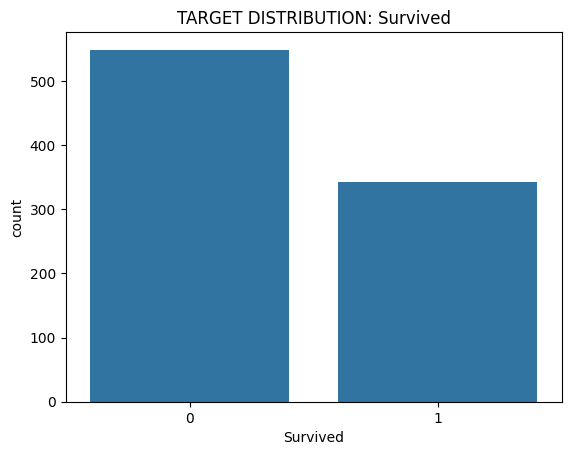

In [ ]:
y.value_counts()
y.value_counts() / df.shape[0] * 100
sns.countplot(x=y)
plt.title('TARGET DISTRIBUTION: '+target)
plt.show()

# Split train-test (NO)

Como estamos en una competicion no sacrificaremos parte del dataset para TEST, haremos Cross-Validation para seleccionar el mejor modelo.

In [ ]:
X_train = X
y_train = y

# Rescaling

Definimos el scaler en el train (.fit_transform).

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()


In [ ]:
X_train_scaled = scaler.fit_transform(X_train)

In [ ]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns = X_train.columns)

# TRAIN MODEL

## Model competition

* Prueba distintos modelos de https://scikit-learn.org/stable/modules/classes.html
y mide su performance con Cross Validation.
* Para ello utiliza la funcion evaluate_classification() para registrar los resultados del benchmark de modelos.

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb

Definimos las métricas:

In [ ]:
#Funcion que calcula el AUC de un modelo sobre un dataset (X-y). Args: modelo a validar, X, y
def auc(model,X,y):
  model.fit(X,y)
  return roc_auc_score(y,model.predict_proba(X)[:,1])

#Funcion que calcula el AUC en Cross-Validation (X-y). Args: modelo a validar, X, y
def auc_cross_validation(model,X,y):
  cross_val = cross_val_score(model,
                              X, y,
                              cv=4,                 # Numero de folds que vamos a utilizar para validar
                              scoring='roc_auc'     # La metrica de validacion que se medira en cada train-valida
                              )
  return cross_val.mean()

In [ ]:
# Inicializa resultados
label_, auc_train_ , auc_valida_ = [], [], []

# Completa un registro en dataframe con los resultados de las funciones definidas previsamente ( AUC y AUC con cross-validation)

# Inputs:
#   * modelo
#   * (X,y)
#   * label especifico si queremos registrar el resultado con otro nombre (opcional)


def evaluate_classification(model, X, y, label=None):
  if label is None:
    label=str(model)
  label_.append(label)

  auc_train = auc(model,X,y)
  auc_valida = auc_cross_validation(model,X,y)
  auc_train_.append(auc_train)
  auc_valida_.append(auc_valida)

  return pd.DataFrame({'Model': label_,
                      'AUC Train': auc_train_,
                      'AUC Cross-Valida': auc_valida_
                      }).sort_values('AUC Cross-Valida',ascending=False)

Algunos modelos a probar:

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
evaluate_classification(GradientBoostingClassifier(),X_train,y_train)

,Model,AUC Train,AUC Cross-Valida
0,GradientBoostingClassifier(),0.950071,0.877231


In [ ]:
...

Ellipsis

## Hyperparameter tuning

La hiperparametrización puede ser costosa sino acotamos lo suficiente el abanico de posibles valores. Como consejo, centrarse en hiperparametrizar los primeros valores que aparecen dentro de la funcion del algoritmo, suelen ser los más determinantes, y no dejar de consultar la documentacion para entender que posibles valores adopta cada parametro.

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
# Definición de parámetros para RandomizedSearchCV
parameters_hp = {
    'learning_rate': [0.05, 0.1, 0.2],  # Tasas de aprendizaje sugeridas
    'max_depth': [3, 4, 5],  # Profundidades máximas sugeridas
    'n_estimators': [25, 50, 75, 100],  # Número de árboles sugeridos
    'subsample': [0.8, 0.9, 1.0],  # Fracción de muestras para entrenar cada árbol
    'min_samples_split': [2, 10, 20],  # Número mínimo de muestras requeridas para dividir un nodo interno
    'min_samples_leaf': [1, 5, 10],  # Número mínimo de muestras requeridas para ser una hoja
    'max_features': ['sqrt', 'log2', 'auto']  # Número de características a considerar para la mejor división
}

# Configuración de RandomizedSearchCV
search_hp = RandomizedSearchCV(
    estimator=XGBClassifier(random_state=42),  # Estimador GradientBoostingClassifier
    param_distributions=parameters_hp,
    scoring='roc_auc',  # Métrica a optimizar: AUC
    cv=3,  # Número de folds para cross-validation
    n_iter=500,  # Número de iteraciones, cada una testeará una configuración distinta
    n_jobs=-1,  # Utilizar todos los procesadores disponibles
    verbose=True
)

# Entrenamiento con el conjunto de entrenamiento
search_hp.fit(X_train, y_train)

# Resultados de la búsqueda aleatoria
print("---- Results from Random Search -----" )
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best AUC:", search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits
---- Results from Random Search -----

 The best estimator across ALL searched params: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_features='auto',
              max_leaves=None, min_child_weight=None, min_samples_leaf=5,
              min_samples_split=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, ...)

 The best AUC: 0.8753475218099894

 The best parameters across ALL searched params:
 {'s

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [20:01:16] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_features", "min_samples_leaf", "min_samples_split" } are not used.

  warnings.warn(smsg, UserWarning)


In [ ]:
 search_hp.best_estimator_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.05, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=4, max_features='auto',
              max_leaves=None, min_child_weight=None, min_samples_leaf=5,
              min_samples_split=10, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=25, ...)

In [ ]:
 search_hp.best_score_

0.8753475218099894

## Final model

Como hemos aplicado hiperparametrizacion, el modelo sera el resultado del proceso (si conseguimos mejorar a la parametrización por default).



In [ ]:
best_model = search_hp.best_estimator_

# PREDICT FOR SUBMISSION

Para hacer el submit de los datos en la competicion, tenemos que hacer un predict sobre el dataset 'titanic_test.csv'.

In [ ]:
X_pred = pd.read_csv('/content/drive/MyDrive/Titanic - Machine Learning from Disaster/test.csv')
print(X_pred)
X_pred.head()

     PassengerId  Pclass                                          Name  \
0            892       3                              Kelly, Mr. James   
1            893       3              Wilkes, Mrs. James (Ellen Needs)   
2            894       2                     Myles, Mr. Thomas Francis   
3            895       3                              Wirz, Mr. Albert   
4            896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   
..           ...     ...                                           ...   
413         1305       3                            Spector, Mr. Woolf   
414         1306       1                  Oliva y Ocana, Dona. Fermina   
415         1307       3                  Saether, Mr. Simon Sivertsen   
416         1308       3                           Ware, Mr. Frederick   
417         1309       3                      Peter, Master. Michael J   

        Sex   Age  SibSp  Parch              Ticket      Fare Cabin Embarked  
0      male  34.5      0      0 

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
X_pred = X_pred.set_index(['PassengerId'])

## Model features

In [ ]:
features_model =  list(best_model.feature_names_in_)
print('Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:\n', features_model)

Estas son las variables que tenemos que conseguir en el preprocessing para que el modelo funcione:
 ['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Sex_male', 'Title_Category_Master', 'Title_Category_Miss', 'Title_Category_Mr', 'Title_Category_Mrs', 'Title_Category_Professional', 'Cabin_Reduced_A', 'Cabin_Reduced_B', 'Cabin_Reduced_C', 'Cabin_Reduced_D', 'Cabin_Reduced_E', 'Cabin_Reduced_F', 'Cabin_Reduced_Unknown', 'Ticket_Prefix_Grouped_A5', 'Ticket_Prefix_Grouped_C', 'Ticket_Prefix_Grouped_NUMERIC', 'Ticket_Prefix_Grouped_OTHER', 'Ticket_Prefix_Grouped_SC', 'Ticket_Prefix_Grouped_STONO', 'Embarked_Cherbourg', 'Embarked_Queenstown', 'Embarked_Southampton']


## ML Preprocessing

Se deben acometer las mismas transformaciones que las realizadas en el preprocessing del train data:
* Generacion de nuevas variables
* Imputación de nulos (mismos valores)
* One Hot Encoding
* Drop de columnas
<br><br>
No repetimos:
* Analisis exploratorio
* Analisis de altas correlaciones
* Analisis de baja varianza

In [ ]:
X_pred['Age'].fillna(-999,inplace=True)

In [ ]:
X_pred['Age'] = X_pred['Age'].astype('float32')

In [ ]:
X_pred['Embarked'] = X_pred['Embarked'].replace({'C' : 'Cherbourg', 'Q': 'Queenstown', 'S' : 'Southampton'})

In [ ]:
X_pred['Embarked'].fillna('Unknown', inplace = True)

In [ ]:
X_pred['Embarked'] = X_pred['Embarked'].astype('category')

In [ ]:
X_pred['Title'] = X_pred['Name'].apply(extract_title)

In [ ]:
X_pred['Title_Category'] = X_pred['Title'].map(title_mapping)

In [ ]:
X_pred.drop(['Name','Title'], axis = 1, inplace = True)

In [ ]:
X_pred.duplicated().any() # No hay registros duplicados

True

In [ ]:
X_pred['Ticket_Prefix'] = X_pred['Ticket'].apply(extract_ticket_prefix)

In [ ]:
X_pred['Ticket_Prefix_Grouped'] = X_pred['Ticket_Prefix'].apply(normalize_and_group_prefix)

In [ ]:
X_pred.drop(['Ticket_Prefix', 'Ticket'], axis = 1, inplace = True)

In [ ]:
X_pred['Cabin'].fillna('Unknown', inplace = True)

In [ ]:
X_pred['Cabin_Reduced'] = X_pred['Cabin'].apply(process_cabin)

In [ ]:
X_pred['Pclass'] = X_pred['Pclass'].astype('category')
X_pred['Pclass'] = X_pred['Pclass'].replace({1: "1ª clase", 2: "2ª clase", 3: "3ª clase"})

In [ ]:
X_pred['Sex'] = X_pred['Sex'].astype('category')

In [ ]:
X_pred['SibSp'] = X_pred['SibSp'].astype('int8')

In [ ]:
X_pred['Parch'] = X_pred['Parch'].astype('int8')

In [ ]:
X_pred['Fare'] = X_pred['Fare'].astype('float32')

In [ ]:
del(X_pred['Cabin'])

In [ ]:
#del(X_pred['PassengerId'])

In [ ]:
X_pred['Title_Category'] = X_pred['Title_Category'].astype('category')

In [ ]:
X_pred['Ticket_Prefix_Grouped'] = X_pred['Ticket_Prefix_Grouped'].astype('category')

In [ ]:
X_pred['Cabin_Reduced'] = X_pred['Cabin_Reduced'].astype('category')

In [ ]:
encoder = OrdinalEncoder(categories=[['1ª clase', '2ª clase', '3ª clase']])
X_pred['Pclass'] = encoder.fit_transform(X_pred[['Pclass']])
# '3ª clase' == 2.0, '2ª clase' == 1.0, '1ª clase' == 0.0

In [ ]:
X_pred = pd.get_dummies(X_pred, columns=['Sex', 'Title_Category', 'Cabin_Reduced', 'Ticket_Prefix_Grouped', 'Embarked'])


## Check model features

Check de variables. Las variables del dataset para PREDICT deben coincidir con las variables utilizadas en el entrenamiento.

In [ ]:
del(X_pred['Sex_female'])

In [ ]:
X_pred.drop(['Title_Category_Military', 'Title_Category_Nobility', 'Cabin_Reduced_G'], axis=1, inplace=True)

In [ ]:
features_test = list(X_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 27
Variables en modelos: 27
¿Match?: True


In [ ]:
missing_features = [i for i in features_model if i not in features_test]
print('Variables que faltan el el dataset:\n', missing_features)

Variables que faltan el el dataset:
 []


In [ ]:
for col in missing_features:
  X_pred[col]= 0

In [ ]:
drop_features = [i for i in features_test if i not in features_model]
print('Variables que debes eliminar de tu dataset:\n', drop_features)

Variables que debes eliminar de tu dataset:
 []


In [ ]:
X_pred.drop(columns = drop_features, inplace=True)

In [ ]:
features_test = list(X_pred.columns)

print('Columnas en dataset:',len(features_test))
print('Variables en modelos:',len(features_model))
print('¿Match?:', features_model == features_test)

Columnas en dataset: 27
Variables en modelos: 27
¿Match?: True


In [ ]:
# Reordena variables
X_pred = X_pred[features_model]

In [ ]:
X_pred['Fare'].fillna(-999, inplace=True)

## Rescaling

Aplicamos mismo scaler que en el training (".transform", no hacer ".fit")

## Predictions

In [ ]:
predictions = best_model.predict(X_pred)

In [ ]:
predictions

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [ ]:
predictions.sum()/len(predictions)

0.3373205741626794

# Upload predictions to Kaggle.com

Se deben subir las predicciones en un .csv con 2 columnas (PassengerId, Survived) en el apartado de submissions en https://www.kaggle.com/competitions/titanic/data. Debe contener 418 rows + header.

In [ ]:
submission = pd.DataFrame(predictions, columns=['Survived'], index = X_pred.index)

In [ ]:
submission.to_csv('/content/drive/MyDrive/M4_Machine_Learning/Notebooks/ML3 - Kaggle competition.csv')

In [ ]:
X_train.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Category_Master,Title_Category_Miss,Title_Category_Mr,Title_Category_Mrs,...,Cabin_Reduced_Unknown,Ticket_Prefix_Grouped_A5,Ticket_Prefix_Grouped_C,Ticket_Prefix_Grouped_NUMERIC,Ticket_Prefix_Grouped_OTHER,Ticket_Prefix_Grouped_SC,Ticket_Prefix_Grouped_STONO,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
0,2.0,22.0,1,0,7.250000,1,0,0,1,0,...,1,1,0,0,0,0,0,0,0,1
1,0.0,38.0,1,0,71.283302,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [ ]:
X_pred.head(2)

,Pclass,Age,SibSp,Parch,Fare,Sex_male,Title_Category_Master,Title_Category_Miss,Title_Category_Mr,Title_Category_Mrs,...,Cabin_Reduced_Unknown,Ticket_Prefix_Grouped_A5,Ticket_Prefix_Grouped_C,Ticket_Prefix_Grouped_NUMERIC,Ticket_Prefix_Grouped_OTHER,Ticket_Prefix_Grouped_SC,Ticket_Prefix_Grouped_STONO,Embarked_Cherbourg,Embarked_Queenstown,Embarked_Southampton
PassengerId,,,,,,,,,,,,,,,,,,,,,
892,2.0,34.5,0,0,7.8292,1,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
893,2.0,47.0,1,0,7.0000,0,0,0,0,1,...,1,0,0,1,0,0,0,0,0,1
